In [2]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\Beyza\Desktop\project"

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    label = file_name.split('_')[2]
                    img = cv2.imread(image_path)
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label)

In [4]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [6]:
# Record the start time before compilation
start_time = time.time()

In [7]:
# Define the combinations of epochs and batch sizes
epochs_values = [20, 30, 40]
batch_sizes = [32, 64]

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


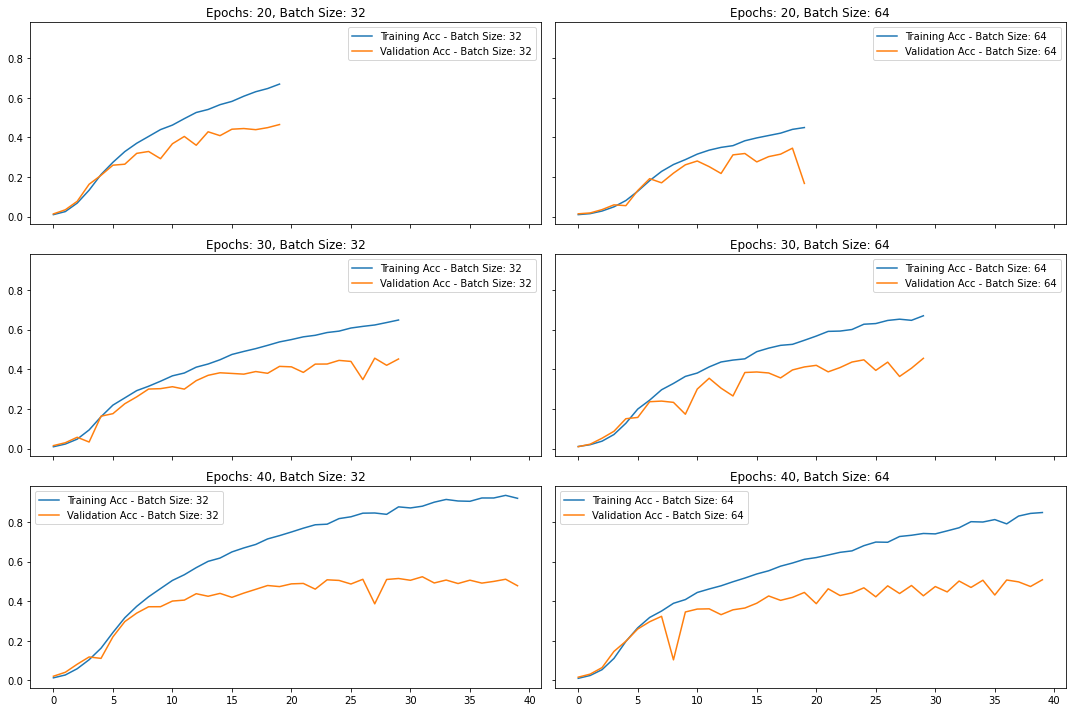

In [8]:
# Create subplots for visualization
fig, axes = plt.subplots(len(epochs_values), len(batch_sizes), figsize=(15, 10), sharex=True, sharey=True)

# Iterate over different combinations
for i, epochs_value in enumerate(epochs_values):
    for j, batch_size in enumerate(batch_sizes):
        # Define and compile the model (make sure to create a new model for each combination)
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(len(label_encoder.classes_), activation='softmax'))

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs_value, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

        # Plot both training and validation accuracies
        axes[i, j].plot(history.history['accuracy'], label=f'Training Acc - Batch Size: {batch_size}')
        axes[i, j].plot(history.history['val_accuracy'], label=f'Validation Acc - Batch Size: {batch_size}')
        axes[i, j].set_title(f'Epochs: {epochs_value}, Batch Size: {batch_size}')
        axes[i, j].legend()

plt.tight_layout()
plt.show()

In [9]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 5142.8653020858765 seconds
